<a href="https://colab.research.google.com/github/vinoothna005/Internship/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
dt = pd.read_csv("/content/FINAL_USO.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [ ]:
dt.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
dt.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

In [ ]:
dt.isnull().values.any()

False

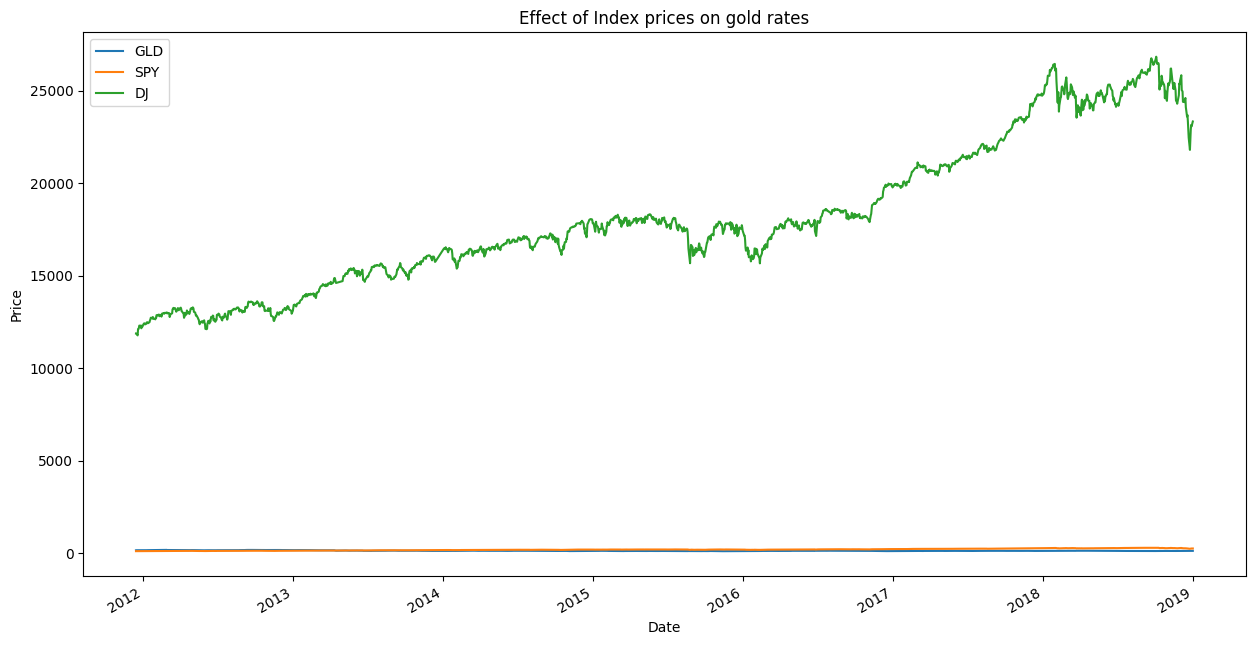

In [ ]:
GLD_adj = dt['Adj Close']
SPY_adj = dt['SP_Ajclose']
DJ_adj  = dt['DJ_Ajclose']

df_p = pd.DataFrame({'GLD':GLD_adj, 'SPY':SPY_adj, 'DJ':DJ_adj})

df_ax = df_p.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

df_ax.set_ylabel('Price')
df_ax.legend(loc='upper left')
plt.show()

In [ ]:
def compute_daily_returns(df):
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

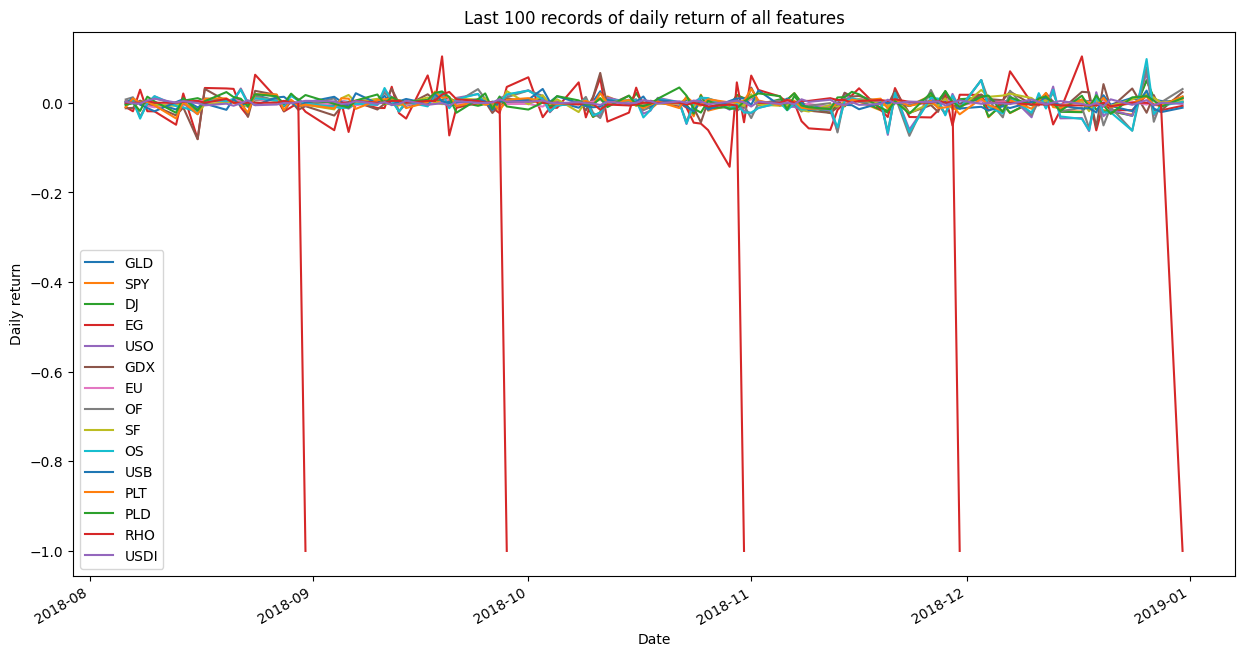

In [ ]:
GLD_adj_close = dt['Adj Close']
SPY_adj_close = dt['SP_Ajclose']
DJ_adj_close  = dt['DJ_Ajclose']
EG_adj_close =  dt['EG_Ajclose']
USO_Adj_close = dt['USO_Adj Close']
GDX_Adj_close = dt['GDX_Adj Close']
EU_price      = dt['EU_Price']
OF_price      = dt['OF_Price']
OS_price      = dt['OS_Price']
SF_price      = dt['SF_Price']
USB_price      = dt['USB_Price']
PLT_price      = dt['PLT_Price']
PLD_price      = dt['PLD_Price']
rho_price      = dt['RHO_PRICE']
usdi_price      = dt['USDI_Price']



GLD_daily_return = compute_daily_returns(GLD_adj_close)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return     = compute_daily_returns(EG_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         =compute_daily_returns(OF_price)
OS_price         =compute_daily_returns(OS_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)
rho_price         =compute_daily_returns(rho_price)
USDI_price         =compute_daily_returns(usdi_price)

df_d = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return, 'USO':USO_Adj_return,
                  'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
                  'RHO':rho_price,'USDI':USDI_price})

daily_ax = df_d[-100:].plot(title='Last 100 records of daily return of all features',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

Mean= -8.65698612128203e-05
Standard Deviation= 0.009611536167006381
Kurtosis= 8.606584924918355


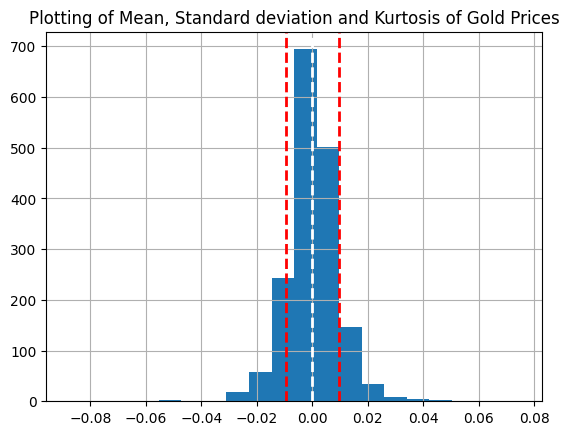

In [ ]:
mean=df_d['GLD'].mean()
# computing standard deviation of Gold stock
std=df_d['GLD'].std()
kurt=df_d['GLD'].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)
#Plotting Histogram
df_d['GLD'].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

<Axes: >

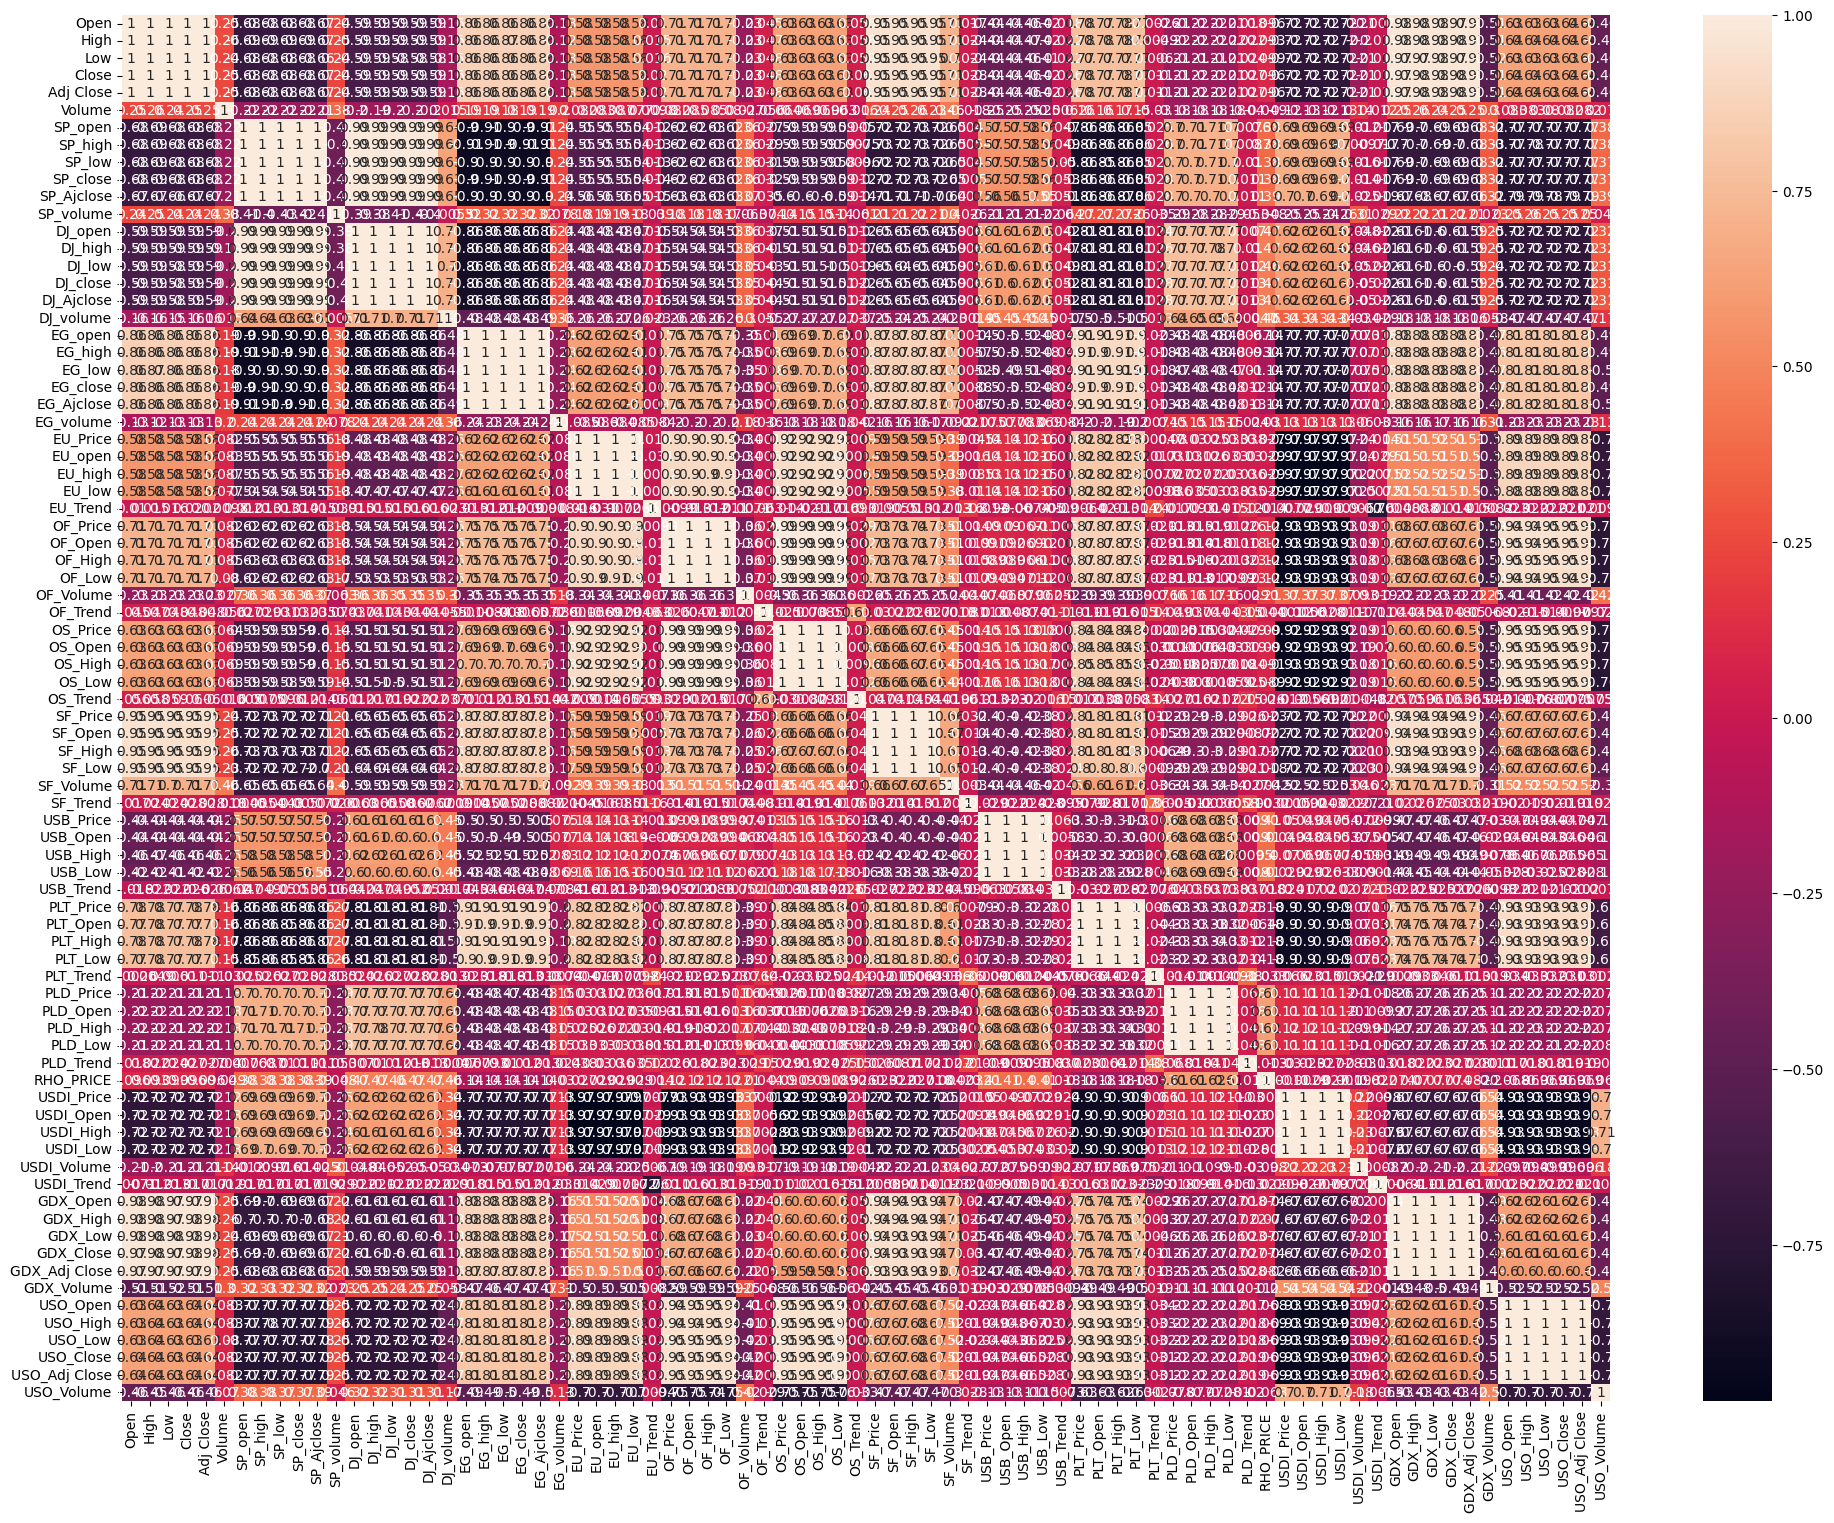

In [ ]:
plt.figure(figsize=(24,18))
sns.heatmap(dt.corr(), annot=True)

In [ ]:
corr_matrix=dt.corr()
coef=corr_matrix["Adj Close"].sort_values(ascending=False)
pos=coef[coef>0]
pos

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

In [ ]:
neg=coef[coef<0]
neg

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

In [ ]:
def calculate_MACD(df, nslow=26, nfast=12):
    emaslow = df.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = df.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    dif = emafast - emaslow
    MACD = dif.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return dif, MACD

def calculate_RSI(df, periods=14):
    # wilder's RSI
    delta = df.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(df, peroids=15):
    SMA = df.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(df, peroids=15):
    STD = df.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(df)
    upper_band = SMA + (2 * STD)
    lower_band = SMA - (2 * STD)
    return upper_band, lower_band

def calculate_stdev(df,periods=5):
    STDEV = df.rolling(periods).std()
    return STDEV

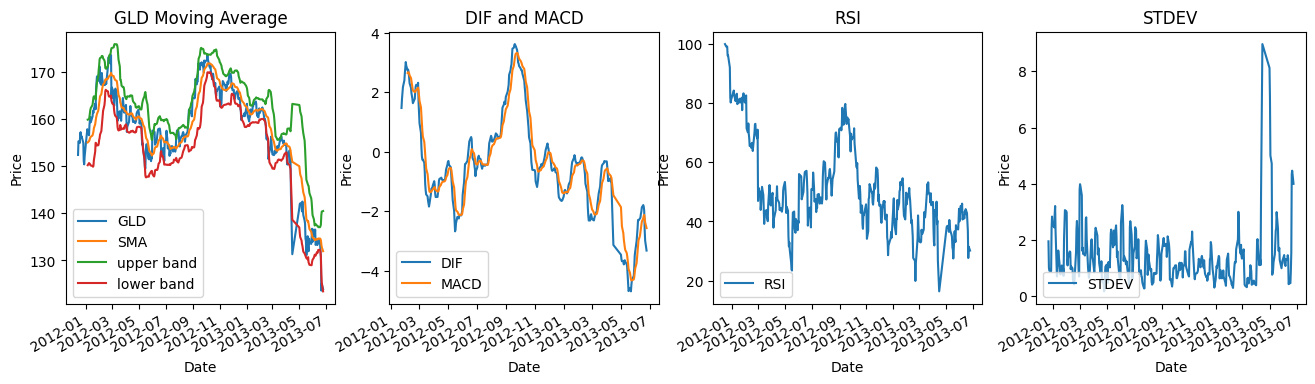

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=dt.Open - dt.Close

High_Low=dt.High-dt.Low

axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[3].set_ylabel('Price')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

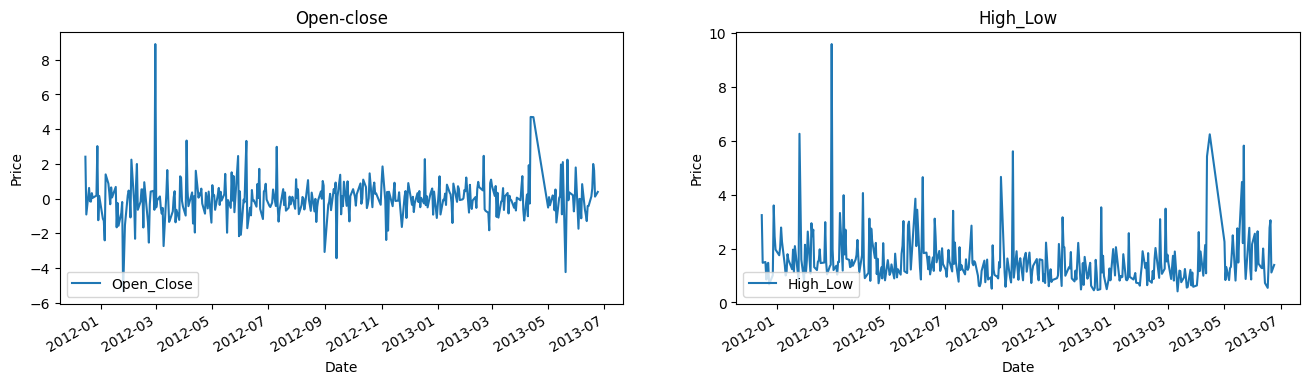

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close=dt.Open - dt.Close
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=dt.High-dt.Low
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')

axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')

In [ ]:
test = dt
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close']=Open_Close
test['High_Low']=High_Low
test = test[33:]
target_adj_close = pd.DataFrame(test['Adj Close'])


display(test.head())

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,166.960007,167.679993,166.610001,167.179993,167.179993,8807400,133.979996,134.509995,133.830002,134.449997,...,6126100,165.198666,173.018365,157.378968,2.724443,2.641891,70.144545,1.562107,-0.219986,1.069992
2012-02-07,167.380005,170.089996,167.149994,169.699997,169.699997,11614300,134.169998,135.020004,133.639999,134.789993,...,10237000,165.894667,173.296304,158.493029,2.754381,2.667095,73.152763,1.594111,-2.319992,2.940002
2012-02-08,169.259995,169.960007,167.500000,168.500000,168.500000,10655500,134.860001,135.220001,134.309998,135.190002,...,9045800,166.428000,173.297467,159.558533,2.655845,2.664634,69.576023,1.575718,0.759995,2.460007
2012-02-09,170.009995,170.369995,167.669998,168.020004,168.020004,16085200,135.410004,135.589996,134.559998,135.360001,...,4663500,166.856000,173.217507,160.494493,2.511947,2.631843,68.148015,0.965153,1.989991,2.699997
2012-02-10,166.490005,167.639999,166.330002,167.139999,167.139999,10326800,134.160004,134.470001,133.839996,134.360001,...,6008600,167.250666,172.795817,161.705515,2.303734,2.562404,65.507009,1.059963,-0.649994,1.309997


In [ ]:
dt.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

In [ ]:
feature_columns = ['Open', 'High', 'Low', 'Volume','SP_open','SP_high','SP_low','SP_Ajclose','SP_volume','DJ_open','DJ_high', 'DJ_low',  'DJ_Ajclose', 'DJ_volume', 'EG_open','EG_high', 'EG_low',
                   'EG_Ajclose', 'EG_volume', 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price','OF_Open','OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open','OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
                   'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
                    'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
                     'USDI_Low', 'USDI_Volume', 'USDI_Trend','GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume','SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD','RSI','STDEV','Open_Close', 'High_Low']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_Ajclose,SP_volume,DJ_open,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.079151,0.037098,0.034927,0.040627,0.028113,0.166542,0.051563,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.109560,0.038247,0.038015,0.039473,0.029765,0.224602,0.050453,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.099173,0.042423,0.039225,0.043542,0.031707,0.232599,0.051907,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.157998,0.045752,0.041465,0.045060,0.032533,0.251876,0.053171,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.095612,0.038187,0.034685,0.040687,0.027676,0.292146,0.053519,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


In [ ]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n After Process \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_Ajclose,SP_volume,DJ_open,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-06,0.913669,0.912561,0.913193,0.079151,0.037098,0.034927,0.040627,0.028113,0.166542,0.051563,...,0.046608,0.906189,0.961240,0.821988,0.893394,0.911893,0.807275,0.167603,0.415010,0.091684
2012-02-07,0.919480,0.945539,0.920622,0.109560,0.038247,0.038015,0.039473,0.029765,0.224602,0.050453,...,0.084243,0.916193,0.965092,0.837893,0.896986,0.915193,0.852413,0.171198,0.280308,0.291045
2012-02-08,0.945490,0.943760,0.925437,0.099173,0.042423,0.039225,0.043542,0.031707,0.232599,0.051907,...,0.073338,0.923859,0.965108,0.853105,0.885164,0.914871,0.798744,0.169132,0.477870,0.239873
2012-02-09,0.955866,0.949370,0.927775,0.157998,0.045752,0.041465,0.045060,0.032533,0.251876,0.053171,...,0.033218,0.930011,0.964000,0.866467,0.867900,0.910578,0.777317,0.100533,0.556766,0.265458
2012-02-10,0.907167,0.912014,0.909341,0.095612,0.038187,0.034685,0.040687,0.027676,0.292146,0.053519,...,0.045532,0.935684,0.958155,0.883757,0.842920,0.901486,0.737688,0.111185,0.387428,0.117271


Shape of features :  (1595, 84)
Shape of target :  (1595, 1)


,Open,High,Low,Volume,SP_open,SP_high,SP_low,SP_Ajclose,SP_volume,DJ_open,...,USO_Volume,SMA,Upper_band,Lower_band,DIF,MACD,RSI,STDEV,Open_Close,High_Low
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-10,0.192169,0.194855,0.197826,0.056946,0.941661,0.940194,0.942612,0.942329,0.102672,0.902780,...,0.155697,0.189260,0.181208,0.201191,0.433658,0.409987,0.277122,0.016145,0.436818,0.043710
2018-08-13,0.178334,0.175424,0.173339,0.082654,0.941782,0.940799,0.939030,0.936462,0.078914,0.897757,...,0.241187,0.186347,0.183882,0.192650,0.422442,0.409742,0.160161,0.082102,0.483643,0.082089
2018-08-14,0.170587,0.170909,0.173476,0.060500,0.938453,0.940860,0.943341,0.946424,0.033346,0.890189,...,0.163939,0.183501,0.183973,0.186903,0.416350,0.408216,0.176614,0.101184,0.440667,0.045843
2018-08-16,0.145822,0.149015,0.149539,0.064819,0.941358,0.946126,0.948685,0.947310,0.087844,0.895570,...,0.159606,0.178154,0.186868,0.173299,0.394435,0.402212,0.082210,0.160751,0.452213,0.060768
2018-08-17,0.149004,0.152709,0.153391,0.075506,0.943960,0.949274,0.948746,0.952845,0.078771,0.912935,...,0.177458,0.174666,0.186049,0.167214,0.389083,0.396241,0.212880,0.140820,0.400898,0.059702


,Adj Close
Date,
2018-08-10,113.070000
2018-08-13,111.099998
2018-08-14,112.129997
2018-08-16,112.690002
2018-08-17,113.019997



 After Process 

Shape of features :  (1505, 84)
Shape of target :  (1505, 1)


,Adj Close
Date,
2018-04-05,126.820000
2018-04-06,127.120003
2018-04-09,128.110001
2018-04-10,126.620003
2018-04-11,127.449997


In [ ]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [ ]:
X_train.shape

(1369, 84)

In [ ]:
X_test.shape

(136, 84)

In [ ]:
y_train.shape

(1369,)

In [ ]:
y_test.shape

(136,)

In [ ]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)

    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

RMSE:  1.9074486925248333
R2 score:  0.798418873877168


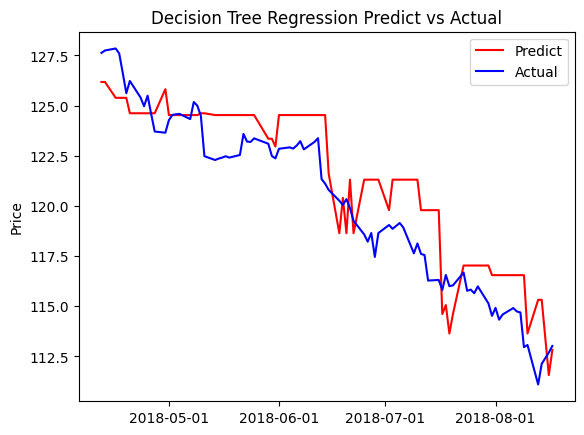

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

_dt=dt.fit(X_train, y_train)

validate_result(_dt, 'Decision Tree Regression')

RMSE:  2.2279943451310786
R2 score:  0.7249749162288324


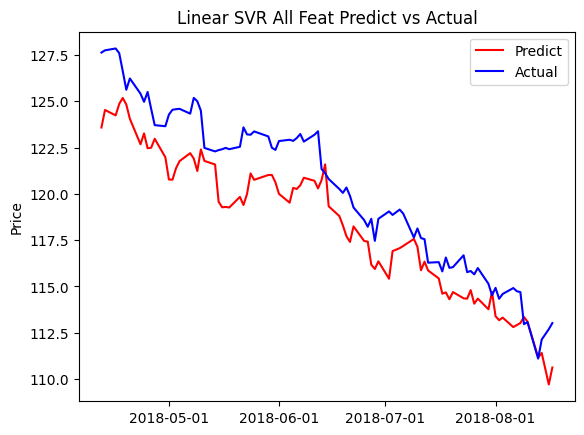

In [ ]:
solution_models = {}
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train,y_train)
validate_result(linear_svr_clf_feat,'Linear SVR All Feat')

RMSE:  0.9228771735289455
R2 score:  0.9528119592563129


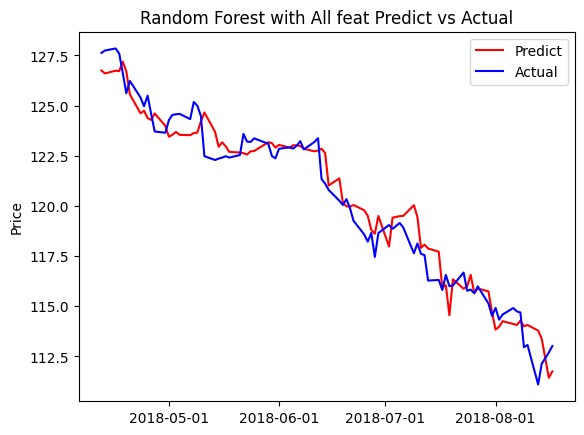

In [ ]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train,y_train)
validate_result(random_forest_clf_feat,'Random Forest with All feat')